In [182]:
import pandas as pd 
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
#filepath='C:\\Users\\qian\\Desktop\\python\\DATA SCIENTIST\\Kaggle\\telco customer churn\\input'
filepath='C:\\Users\\LiuMingyue\\Desktop\\telco customer churn\\input'
os.chdir(filepath)
df=pd.read_csv('datasets_13996_18858_WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#df_test=pd.read_csv('test.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Tenure is the period that customer has stayed with company. Assume TotalCharges=Tenure*MonthlyCharge. <br>
To verify it, calculate the correlation coefficient of them

In [3]:
TotalCharges_cal=df.tenure*df.MonthlyCharges
TotalCharges_cal.corr(df.TotalCharges.map(lambda x:0 if x.isspace() else float(x)))

0.9995605537972277

Correlation coefficient is close to 1. It means assumption is right 

In [183]:
#Replacing spaces with null values in total charges column
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)
df = df[df["TotalCharges"].notnull()]
df = df.reset_index()[df.columns]

#convert to float type
df["TotalCharges"] = df["TotalCharges"].astype(float)

# split the data into training and test 

In [184]:
from sklearn.model_selection import train_test_split
df_x=df.loc[:,'gender':'TotalCharges']
df_y=df.Churn.map(lambda x:1 if x=='Yes' else 0)
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.2,random_state=1)

# Data visualization

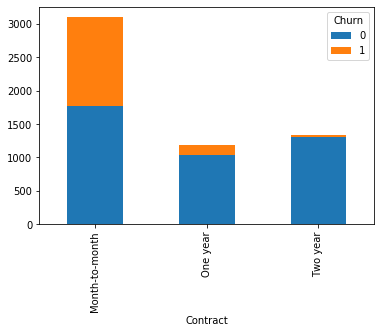

In [18]:
#sns.pairplot(pd.concat([x_train,y_train],axis=1),x_vars=['tenure'],y_vars=['Churn'])
pd.crosstab(x_train.Contract,y_train).plot.bar(stacked=True)

Contract type affect Churn rate significantly. Month-to-month customers are much more likely to leave than the other two contracts

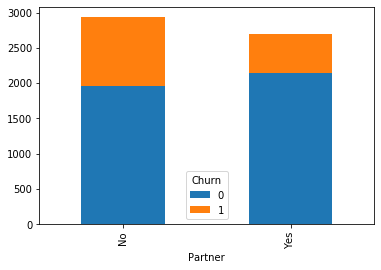

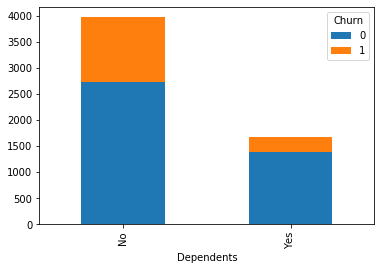

In [31]:
#plt.figure
#plt.figure()
#plt.subplot(1,2,1)
pd.crosstab(x_train.Partner,y_train).plot.bar(stacked=True)
#plt.show()
#plt.subplot(1,2,2)
pd.crosstab(x_train.Dependents,y_train).plot.bar(stacked=True)

Partner and dependents have similar impact on the result. Customers without partner/dependents are more likely to quit

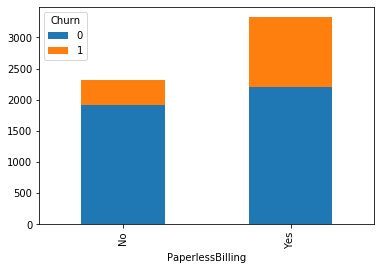

In [36]:
pd.crosstab(x_train.PaperlessBilling,y_train).plot.bar(stacked=True)



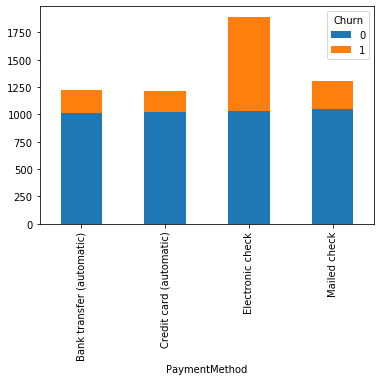

In [37]:
pd.crosstab(x_train.PaymentMethod,y_train).plot.bar(stacked=True)


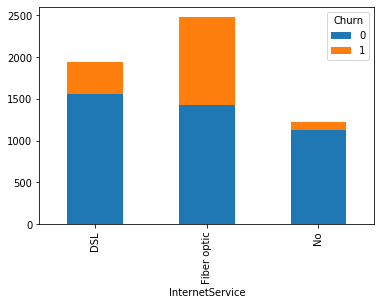

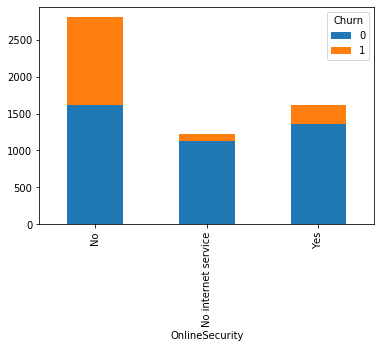

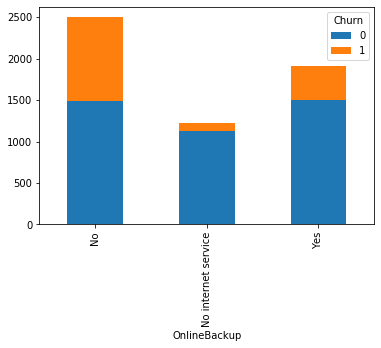

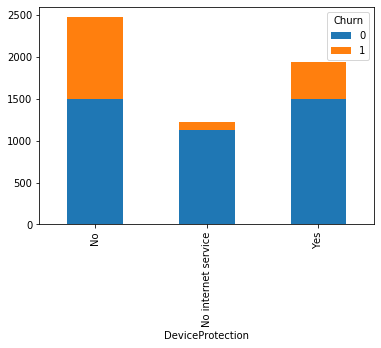

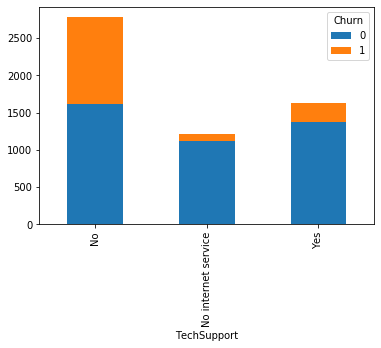

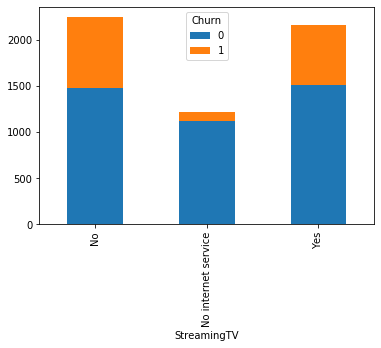

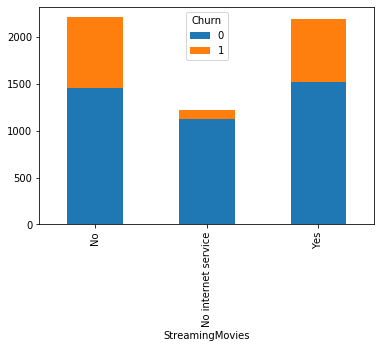

In [44]:
pd.crosstab(x_train.InternetService,y_train).plot.bar(stacked=True)
pd.crosstab(x_train.OnlineSecurity,y_train).plot.bar(stacked=True)
pd.crosstab(x_train.OnlineBackup,y_train).plot.bar(stacked=True)
pd.crosstab(x_train.DeviceProtection,y_train).plot.bar(stacked=True)
pd.crosstab(x_train.TechSupport,y_train).plot.bar(stacked=True)
pd.crosstab(x_train.StreamingTV,y_train).plot.bar(stacked=True)
pd.crosstab(x_train.StreamingMovies,y_train).plot.bar(stacked=True)





Combine internet related data to see how it relates to churn
It turns out that four internet service shows similar tread: the more service a customer has, the less likely he would leave. <br>
And two streaming services are similar:no obvious pattern</font>

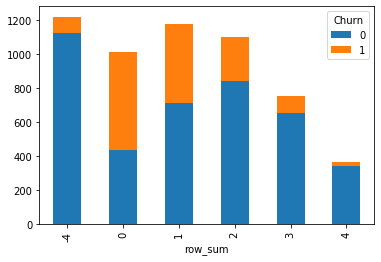

In [72]:
cols=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'] #'StreamingTV','StreamingMovies'
#cols=['StreamingTV','StreamingMovies']
internet_event = None
for i in cols:
    tmp=x_train[i].replace('Yes',1)
    tmp=tmp.replace('No',0)
    tmp=tmp.replace('No internet service',-1)
    if internet_event is None:
        internet_event = tmp
    else:
        internet_event = pd.concat([internet_event,tmp],axis=1)    
internet_event['row_sum'] = internet_event.apply(lambda x:x.sum(),axis=1)
pd.crosstab(internet_event['row_sum'],y_train).plot.bar(stacked=True)


Discrete tenure into categorial value ( 0-1,2-9,10-19,20-39,40+) <br>    
We can find that the longer the customer stays, the less likely he will quit. 

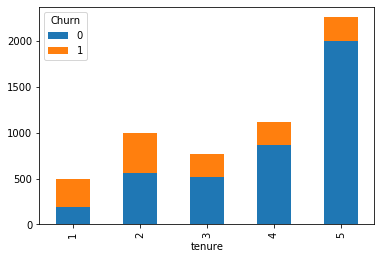

In [13]:
#pd.crosstab(x_train.tenure,y_train).plot.bar(stacked=True)
#sns.distplot(x_train.tenure)
def discret(x):
    if x<2:
        return 1
    elif x<10:
        return 2
    elif x<20:
        return 3
    elif x<40:
        return 4
    else:
        return 5
tenure_group=x_train.tenure.map(discret)
pd.crosstab(tenure_group,y_train).plot.bar(stacked=True)

Discrete MonthlyCharges into categorial value ( 0-35,35-70,70+)    <br>
We can find that the more money the customer pays, the more likely he will quit.

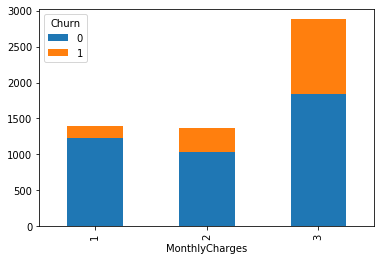

In [19]:
#pd.crosstab(x_train.MonthlyCharges,y_train).plot.bar(stacked=True)
#sns.distplot(x_train.MonthlyCharges)
#x_train.MonthlyCharges.describe()
def discret(x):
    if x<35:
        return 1
    elif x<70:
        return 2
    else:
        return 3

MonthlyCharges_group=x_train.MonthlyCharges.map(discret)
pd.crosstab(MonthlyCharges_group,y_train).plot.bar(stacked=True)

# Missing data

In [43]:
#x_train.isnull().sum()
x_test.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

No missing data in both training and test training set.

# Feature engineering
combine partner and dependents <br>
combine four internet extra service <br>
combine two streaming service <br>
combine two phone service (drop phoneservice)<br>
drop total charges

Transform str to int: gender,partner,dependents, two phone service, seven internet service,contract,paperlessbilling,payment method

In [185]:
x_train.loc[:,'gender'] = x_train.gender.map({'Male':0,'Female':1})
x_test.loc[:,'gender'] = x_test.gender.map({'Male':0,'Female':1})
x_train.loc[:,'Partner'] = x_train.Partner.map({'No':0,'Yes':1})
x_test.loc[:,'Partner'] = x_test.Partner.map({'No':0,'Yes':1})
x_train.loc[:,'Dependents'] = x_train.Dependents.map({'No':0,'Yes':1})
x_test.loc[:,'Dependents'] = x_test.Dependents.map({'No':0,'Yes':1})
#x_train.PhoneService = x_train.PhoneService.map({'No':0,'Yes':1})
#x_test.PhoneService = x_test.PhoneService.map({'No':0,'Yes':1})
x_train.loc[:,'MultipleLines'] = x_train.MultipleLines.map({'No phone service':0,'No':1,'Yes':2})
x_test.loc[:,'MultipleLines'] = x_test.MultipleLines.map({'No phone service':0,'No':1,'Yes':2})
x_train.loc[:,'InternetService'] = x_train.InternetService.map({'No':0,'Fiber optic':1,'DSL':2})
x_test.loc[:,'InternetService'] = x_test.InternetService.map({'No':0,'Fiber optic':1,'DSL':2})
x_train.loc[:,'OnlineSecurity'] = x_train.OnlineSecurity.map({'No':0,'No internet service':-1,'Yes':1})
x_test.loc[:,'OnlineSecurity'] = x_test.OnlineSecurity.map({'No':0,'No internet service':-1,'Yes':1})
x_train.loc[:,'OnlineBackup'] = x_train.OnlineBackup.map({'No':0,'No internet service':-1,'Yes':1})
x_test.loc[:,'OnlineBackup'] = x_test.OnlineBackup.map({'No':0,'No internet service':-1,'Yes':1})
x_train.loc[:,'DeviceProtection'] = x_train.DeviceProtection.map({'No':0,'No internet service':-1,'Yes':1})
x_test.loc[:,'DeviceProtection'] = x_test.DeviceProtection.map({'No':0,'No internet service':-1,'Yes':1})
x_train.loc[:,'TechSupport'] = x_train.TechSupport.map({'No':0,'No internet service':-1,'Yes':1})
x_test.loc[:,'TechSupport'] = x_test.TechSupport.map({'No':0,'No internet service':-1,'Yes':1})
x_train.loc[:,'StreamingTV'] = x_train.StreamingTV.map({'No':0,'No internet service':-1,'Yes':1})
x_test.loc[:,'StreamingTV'] = x_test.StreamingTV.map({'No':0,'No internet service':-1,'Yes':1})
x_train.loc[:,'StreamingMovies'] = x_train.StreamingMovies.map({'No':0,'No internet service':-1,'Yes':1})
x_test.loc[:,'StreamingMovies'] = x_test.StreamingMovies.map({'No':0,'No internet service':-1,'Yes':1})
x_train.loc[:,'Contract'] = x_train.Contract.map({'Month-to-month':0,'One year':1,'Two year':2})
x_test.loc[:,'Contract'] = x_test.Contract.map({'Month-to-month':0,'One year':1,'Two year':2})
x_train.loc[:,'PaperlessBilling'] = x_train.PaperlessBilling.map({'No':0,'Yes':1})
x_test.loc[:,'PaperlessBilling'] = x_test.PaperlessBilling.map({'No':0,'Yes':1})
x_train.loc[:,'PaymentMethod'] = x_train.PaymentMethod.map({'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3})
x_test.loc[:,'PaymentMethod'] = x_test.PaymentMethod.map({'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3})

In [186]:
# combine partner and dependents
x_train.loc[:,'Part_depend'] = x_train.Partner+x_train.Dependents
x_test.loc[:,'Part_depend'] = x_test.Partner+x_test.Dependents

# combine four internet extra service
x_train.loc[:,'InternetExtra'] = x_train.OnlineSecurity+x_train.OnlineBackup+x_train.DeviceProtection+x_train.TechSupport
x_test.loc[:,'InternetExtra'] = x_test.OnlineSecurity+x_test.OnlineBackup+x_test.DeviceProtection+x_test.TechSupport

# combine two streaming service
x_train.loc[:,'StreamingService'] = x_train.StreamingTV+x_train.StreamingMovies
x_test.loc[:,'StreamingService'] = x_test.StreamingTV+x_test.StreamingMovies



In [187]:
# drop Partner,Dependents,phoneservice, 4 internet service and two streaming service
x_train.drop(['Partner', 'Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'], axis=1,inplace=True)
x_test.drop(['Partner', 'Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'], axis=1,inplace=True)

In [192]:
x_train.head(10)

gender  SeniorCitizen  tenure  MultipleLines  InternetService  Contract  \
3451       1              0       1              1                0         0   
611        0              0      66              1                0         2   
588        0              0      71              2                2         2   
2680       1              0      72              2                1         2   
1544       0              0       1              1                2         0   
2883       1              1       1              1                1         0   
1072       1              0      59              2                1         0   
6926       1              0      28              0                2         0   
6417       1              0      41              1                2         1   
997        1              0       7              1                1         0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  \
3451                 1              1           19.50         19.50   
611                  0              1           20.55       1357.10   
588                  0              0           90.40       6668.05   
2680                 0              2          100.65       7334.05   
1544                 1              1           45.85         45.85   
2883                 1              0           71.00         71.00   
1072                 1              2           96.65       5580.80   
6926                 1              1           35.75        961.40   
6417                 0              2           50.05       2029.05   
997                  1              0           95.35        660.90   

      Part_depend  InternetExtra  StreamingService  
3451            0             -4                -2  
611             1             -4                -2  
588             2              4                 2  
2680            1              3                 1  
1544            0              0                 0  
2883            1              0                 0  
1072            2              2                 1  
6926            0              2                 0  
6417            0              1                 0  
997             0              1                 2

# Training model

based on 10-fold cross validation, random forest achieves the highest accuracy rate

In [189]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# decision tree
tree_clf = DecisionTreeClassifier()
#tree_clf.fit(x_train,y_train)
#score_tree = tree_clf.score(x_train,y_train)
#score_tree = tree_clf.score(x_test,y_test)
score_tree = cross_val_score(tree_clf, x_train, y_train, cv=10)

#random forest
forest_clf = RandomForestClassifier(n_estimators=100,max_depth=5,random_state=1)
#forest_clf.fit(x_train,y_train)
#score_forest = forest_clf.score(x_train,y_train)
#score_forest = forest_clf.score(x_test,y_test)
score_forest = cross_val_score(forest_clf, x_train, y_train, cv=10)

# logistic regression
lr_clf = LogisticRegression()
#lr_clf.fit(x_train,y_train)
#score_lr = lr_clf.score(x_train,y_train)
#score_lr = lr_clf.score(x_test,y_test)
score_lr = cross_val_score(lr_clf, x_train, y_train, cv=10)

#svm
svm_clf = SVC()
#svm_clf.fit(x_train,y_train)
#score_svm = svm_clf.score(x_train,y_train)
#score_svm = svm_clf.score(x_test,y_test)
score_svm = cross_val_score(svm_clf, x_train, y_train, cv=10)

print('decision tree= %f, random forest=%f, logistic regression=%f, svm=%f' % (score_tree.mean(), score_forest.mean(),score_lr.mean(),score_svm.mean()))

decision tree= 0.722850, random forest=0.798759, logistic regression=0.791293, svm=0.732800


In [190]:
# try to find the best hyper parameter for random forest
RF = RandomForestClassifier(random_state=1)
RF_para={'n_estimators':[10,50,100],'max_depth':[1,2,3,4,5],'criterion':['gini','entropy']}
GSRF = GridSearchCV(RF,RF_para,scoring='accuracy',cv=10)
GSRF.fit(x_train,y_train)
GSRF.best_score_
# find the best paras of gini,n_estimators=50,max_depth=5



0.8000034765459569

In [191]:
from sklearn.metrics import accuracy_score
#predict test
pred = GSRF.predict(x_test)
accuracy_score(y_test,pred)

0.798862828713575